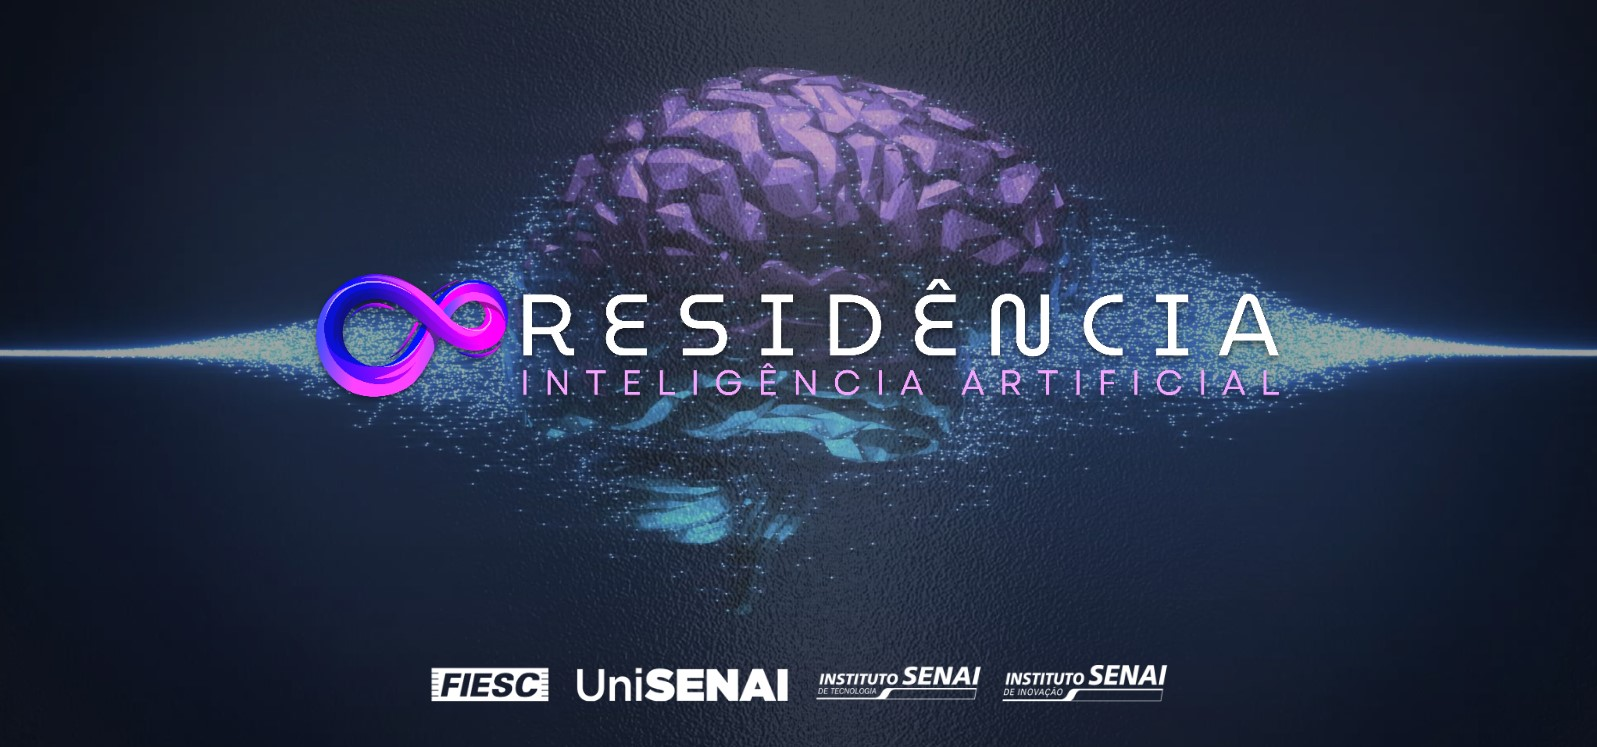

---


## **Projeto Final Bootcamp Ciência de Dados e Inteligência Artificial**
## **Aluno**: Daniel Vidiri Neto
## **Turma**: Ago/2025


---

# **Projeto de Manutenção Preditiva com IA**

## **Etapa 1: Compreensão do Problema e Contextualização**

### **1.1. Descrição dos Dados**

O projeto consiste em desenvolver um sistema inteligente de manutenção preditiva para máquinas industriais. O objetivo principal é identificar falhas e, se possível, o tipo de falha, a partir de dados coletados por dispositivos IoT. A empresa espera que o sistema preveja a classe do defeito e retorne a probabilidade associada, além de extrair insights e gerar visualizações de dados.

<br>**Dois arquivos de dados são fornecidos:**
- **Bootcamp_train.csv** : Utilizado para exploração, treinamento e avaliação dos modelos.
- **Bootcamp_test.csv** : Não contém os rótulos e deve ser usado para predições finais.

<br>**As colunas presentes no dataset de treino são:**
- **id** : Identificador das amostras.
- **id_produto** : Identificador único do produto (combinação de Tipo e número de
identificação).
- **tipo** : Tipo de produto/máquina (L/M/H).
- **temperatura_ar** : Temperatura do ar no ambiente (K).
- **temperatura_processo** : Temperatura do processo (K).
- **umidade_relativa** : Umidade relativa do ar (%).
- **velocidade_rotacional** : Velocidade rotacional da máquina em rotações por minutos
(RPM).
- **torque** : Torque da máquina em Nm.
- **desgaste_da_ferramenta** : Duração do uso da ferramenta em minutos.
- **falha_maquina** : Indica se houve falha na máquina (1) ou não (0).
- **FDF (Falha Desgaste Ferramenta)** : Indica se houve falha por desgaste da ferramenta (1) ou não (0).
- **FDC (Falha Dissipacao Calor)** : Indica se houve falha por dissipação de calor (1) ou não (0).
- **FP (Falha Potencia)** : Indica se houve falha por potência (1) ou não (0).
- **FTE (Falha Tensao Excessiva)** : Indica se houve falha por tensão excessiva (1) ou não (0).
- **FA (Falha Aleatoria)** : Indica se houve falha aleatória (1) ou não (0).

<br>Nesta primeira etapa, vamos focar em entender o problema de negócio e a estrutura dos dados que nos foram fornecidos. Isso inclui a importação das bibliotecas essenciais, o carregamento do dataset e uma análise inicial para verificar a integridade e o formato dos dados. O objetivo é ter uma visão clara do que temos em mãos antes de prosseguir para etapas mais complexas de pré-processamento e modelagem.

In [1]:
# Importando as bilbiotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1.2. Carregamento dos Dados**

**Carregamento dos Dados**

Vamos carregar o arquivo `bootcamp_train.csv` em um DataFrame do pandas para começar a explorá-lo.

In [2]:
# Carregando o dataset de treinamento
df = pd.read_csv("bootcamp_train.csv")

# Exibindo as primeiras 5 linhas do DataFrame para uma visão geral
print("Primeiras 5 linhas do DataFrame:")
df.head()

Primeiras 5 linhas do DataFrame:


,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
0,0,L56434,L,298.3,309.1,90.0,1616.0,31.1,195.0,não,False,False,Não,False,Não
1,1,L48741,L,298.2,308.4,90.0,1388.0,53.8,137.0,Não,False,False,Não,False,Não
2,2,L48850,L,298.2,307.8,90.0,1528.0,31.1,NaN,Não,N,False,Não,False,Não
3,3,M20947,M,300.9,310.8,90.0,1599.0,33.0,7.0,não,False,False,Não,False,não
4,4,L53849,L,-36.0,310.5,90.0,1571.0,33.9,NaN,não,N,False,não,False,Não


In [3]:
# Exibindo as 10 últimas linhas do DataFrame
print("10 últimas linhas do DataFrame:")
df.tail(10)

10 últimas linhas do DataFrame:


,id,id_produto,tipo,temperatura_ar,temperatura_processo,umidade_relativa,velocidade_rotacional,torque,desgaste_da_ferramenta,falha_maquina,FDF (Falha Desgaste Ferramenta),FDC (Falha Dissipacao Calor),FP (Falha Potencia),FTE (Falha Tensao Excessiva),FA (Falha Aleatoria)
35250,35250,L48757,L,298.3,-38.0,90.0,1593.0,33.0,179.0,Não,False,False,Não,False,não
35251,35251,L52555,L,302.9,312.3,90.0,-161.0,64.7,185.0,Não,False,False,Não,False,Não
35252,35252,L57118,L,298.3,308.1,90.0,1911.0,23.3,NaN,não,N,False,N,False,Não
35253,35253,L51264,L,302.0,-38.0,90.0,1483.0,35.6,119.0,Não,False,0,Não,False,Não
35254,35254,M23501,M,297.5,308.4,90.0,1355.0,55.5,77.0,não,False,False,não,False,Não
35255,35255,L54709,L,300.1,311.4,90.0,1634.0,34.2,45.0,não,False,False,não,False,Não
35256,35256,L54735,L,300.4,311.3,90.0,1597.0,36.2,112.0,0,False,False,Não,False,Não
35257,35257,L54275,L,300.6,-38.0,90.0,1485.0,35.8,19.0,Não,False,False,Não,False,Não
35258,35258,M18165,M,301.3,310.4,90.0,1577.0,37.3,43.0,não,False,False,não,False,não
35259,35259,L53432,L,300.8,310.3,90.0,1438.0,44.1,198.0,Não,False,False,não,False,Não


### **1.3. Análise Inicial da Estrutura dos Dados**

**Análise Inicial da Estrutura dos Dados**

É fundamental verificar o tipo de dado de cada coluna, a quantidade de valores não nulos e o uso de memória. Isso nos dará uma ideia de quais colunas podem precisar de tratamento de valores ausentes ou conversão de tipo.

In [4]:
# Verificando o tamanho do DataFrame (linhas x colunas)
df.shape

(35260, 15)

In [5]:
# Exibindo informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
print("Informações gerais do DataFrame:")
df.info()

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               35260 non-null  int64  
 1   id_produto                       35260 non-null  object 
 2   tipo                             35260 non-null  object 
 3   temperatura_ar                   34644 non-null  float64
 4   temperatura_processo             34661 non-null  float64
 5   umidade_relativa                 35260 non-null  float64
 6   velocidade_rotacional            34509 non-null  float64
 7   torque                           34637 non-null  float64
 8   desgaste_da_ferramenta           34308 non-null  float64
 9   falha_maquina                    35260 non-null  object 
 10  FDF (Falha Desgaste Ferramenta)  35260 non-null  object 
 11  FDC (Falha Dissipacao Calor)     35260 non-null

**Verificação de Valores Ausentes**

Vamos quantificar a presença de valores nulos em cada coluna para identificar onde o pré-processamento será necessário.

In [6]:
# Verificando a quantidade de valores nulos por coluna
print("Valores nulos por coluna:")
df.isnull().sum()

Valores nulos por coluna:


,0
id,0
id_produto,0
tipo,0
temperatura_ar,616
temperatura_processo,599
umidade_relativa,0
velocidade_rotacional,751
torque,623
desgaste_da_ferramenta,952
falha_maquina,0


**Análise de Inconsistências em Colunas Categóricas**

Como observado nas orientações do projeto no PDF, algumas colunas categóricas podem ter inconsistências (diferentes representações para o mesmo valor). Vamos verificar as colunas de falha para entender a natureza dessas inconsistências.

In [7]:
# Verificando a contagem de valores únicos para as colunas de falha
print("\nContagem de valores para 'falha_maquina':")
print(df["falha_maquina"].value_counts())

print("\nContagem de valores para 'FDF (Falha Desgaste Ferramenta)':")
print(df["FDF (Falha Desgaste Ferramenta)"].value_counts())

print("\nContagem de valores para 'FDC (Falha Dissipacao Calor)':")
print(df["FDC (Falha Dissipacao Calor)"].value_counts())

print("\nContagem de valores para 'FP (Falha Potencia)':")
print(df["FP (Falha Potencia)"].value_counts())

print("\nContagem de valores para 'FTE (Falha Tensao Excessiva)':")
print(df["FTE (Falha Tensao Excessiva)"].value_counts())

print("\nContagem de valores para 'FA (Falha Aleatoria)':")
print(df["FA (Falha Aleatoria)"].value_counts())


Contagem de valores para 'falha_maquina':
falha_maquina
Não    21926
não    11303
N        691
0        678
Sim      420
sim      217
y         13
1         12
Name: count, dtype: int64

Contagem de valores para 'FDF (Falha Desgaste Ferramenta)':
FDF (Falha Desgaste Ferramenta)
False    33729
N          702
0          688
True        70
-           70
1            1
Name: count, dtype: int64

Contagem de valores para 'FDC (Falha Dissipacao Calor)':
FDC (Falha Dissipacao Calor)
False    33649
nao        700
0          686
True       217
y            4
1            4
Name: count, dtype: int64

Contagem de valores para 'FP (Falha Potencia)':
FP (Falha Potencia)
Não    22282
não    11462
N        702
0        688
Sim       81
sim       41
1          2
y          2
Name: count, dtype: int64

Contagem de valores para 'FTE (Falha Tensao Excessiva)':
FTE (Falha Tensao Excessiva)
False    35090
True       170
Name: count, dtype: int64

Contagem de valores para 'FA (Falha Aleatoria)':
FA (Falha

## **Etapa 2: Análise Exploratória de Dados (EDA) e Pré-processamento**

Nesta etapa, vamos aprofundar a compreensão dos dados, tratar inconsistências e preparar o dataset para a modelagem. Isso inclui a limpeza de valores inconsistentes, o tratamento de dados ausentes, a engenharia de features e o escalonamento de variáveis numéricas. O objetivo é ter um dataset limpo, consistente e no formato adequado para os algoritmos de Machine Learning.

### **2.1. Tratamento de Inconsistências em Colunas Categóricas**

Como observado na Etapa 1, as colunas de falha (`falha_maquina`, `FDF (Falha Desgaste Ferramenta)`, `FDC (Falha Dissipacao Calor)`, `FP (Falha Potencia)`, `FA (Falha Aleatoria)`) apresentam múltiplas representações para os mesmos valores (e.g., 'Não', 'não', 'N', '0', 'nao' para 'Não'; 'Sim', 'sim', '1', 'y' para 'Sim'). Além disso, a coluna `FDF (Falha Desgaste Ferramenta)` possui um valor '-' que precisa ser tratado.

Vamos padronizar esses valores para `True` (1) e `False` (0) para facilitar a análise e a modelagem.

In [8]:
# Mapeamento de valores inconsistentes para padronização
mapeamento_falha = {
    'Não': False, 'não': False, 'N': False, '0': False, 'nao':False,
    'Sim': True, 'sim': True, 'y': True, '1': True
}

In [9]:
# Colunas de falha a serem padronizadas
colunas_falha = [
    'falha_maquina',
    'FDF (Falha Desgaste Ferramenta)',
    'FDC (Falha Dissipacao Calor)',
    'FP (Falha Potencia)',
    'FA (Falha Aleatoria)'
]

In [10]:
# Aplicar o mapeamento e tratar o valor '-' na coluna FDF
for col in colunas_falha:
    # Substituir '-' por NaN temporariamente para depois tratar como False
    if col == 'FDF (Falha Desgaste Ferramenta)':
        df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].replace(mapeamento_falha)
    # Após o mapeamento, converter para tipo booleano. Valores NaN (do '-') serão False
    df[col] = df[col].astype(bool)

/tmp/ipython-input-2812870429.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeamento_falha)
/tmp/ipython-input-2812870429.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapeamento_falha)


In [11]:
# Verificar novamente a contagem de valores para confirmar a padronização
print("\nContagem de valores após padronização:")
for col in colunas_falha:
    print(f"\n{col}:")
    print(df[col].value_counts())

# A coluna FTE (Falha Tensao Excessiva) já é booleana, então não precisa de tratamento aqui.


Contagem de valores após padronização:

falha_maquina:
falha_maquina
False    34598
True       662
Name: count, dtype: int64

FDF (Falha Desgaste Ferramenta):
FDF (Falha Desgaste Ferramenta)
True     33870
False     1390
Name: count, dtype: int64

FDC (Falha Dissipacao Calor):
FDC (Falha Dissipacao Calor)
True     33874
False     1386
Name: count, dtype: int64

FP (Falha Potencia):
FP (Falha Potencia)
False    35134
True       126
Name: count, dtype: int64

FA (Falha Aleatoria):
FA (Falha Aleatoria)
False    35116
True       144
Name: count, dtype: int64


### **2.2. Tratamento de Dados Ausentes**

Identificamos na Etapa 1 que algumas colunas numéricas (`temperatura_ar`, `temperatura_processo`, `velocidade_rotacional`, `torque`, `desgaste_da_ferramenta`) possuem valores nulos. Para este projeto, vamos optar por preencher esses valores ausentes com a mediana de cada coluna.

A mediana é uma escolha robusta, pois é menos sensível a outliers do que a média, o que é importante em dados reais de sensores.

In [12]:
# Colunas numéricas com valores ausentes
colunas_numericas_com_nan = [
    'temperatura_ar',
    'temperatura_processo',
    'velocidade_rotacional',
    'torque',
    'desgaste_da_ferramenta'
]

In [13]:
# Preencher valores ausentes com a mediana de cada coluna
for col in colunas_numericas_com_nan:
    mediana_col = df[col].median()
    df[col].fillna(mediana_col, inplace=True)
    print(f"Valores ausentes na coluna '{col}' preenchidos com a mediana: {mediana_col:.2f}")

Valores ausentes na coluna 'temperatura_ar' preenchidos com a mediana: 299.60
Valores ausentes na coluna 'temperatura_processo' preenchidos com a mediana: 309.80
Valores ausentes na coluna 'velocidade_rotacional' preenchidos com a mediana: 1483.00
Valores ausentes na coluna 'torque' preenchidos com a mediana: 40.30
Valores ausentes na coluna 'desgaste_da_ferramenta' preenchidos com a mediana: 94.00


/tmp/ipython-input-261392098.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mediana_col, inplace=True)


In [14]:
# Verificar novamente a quantidade de valores nulos para confirmar o tratamento
print("\nValores nulos por coluna após tratamento:")
print(df.isnull().sum())


Valores nulos por coluna após tratamento:
id                                 0
id_produto                         0
tipo                               0
temperatura_ar                     0
temperatura_processo               0
umidade_relativa                   0
velocidade_rotacional              0
torque                             0
desgaste_da_ferramenta             0
falha_maquina                      0
FDF (Falha Desgaste Ferramenta)    0
FDC (Falha Dissipacao Calor)       0
FP (Falha Potencia)                0
FTE (Falha Tensao Excessiva)       0
FA (Falha Aleatoria)               0
dtype: int64


### **2.3. Engenharia de Features**

Nesta sub-etapa, vamos realizar a codificação de variáveis categóricas e considerar a criação de novas features que possam agregar valor ao modelo.

#### 2.3.1. Codificação da Variável 'tipo'

A coluna `tipo` (L/M/H) é categórica e representa o tipo de produto/máquina. Vamos aplicar One-Hot Encoding para transformá-la em um formato numérico que os modelos de Machine Learning possam entender. Esta técnica cria novas colunas binárias para cada categoria única, evitando a introdução de uma ordem artificial entre as categorias.

In [15]:
# Aplicar One-Hot Encoding na coluna 'tipo'
df = pd.get_dummies(df, columns=['tipo'], prefix='tipo')

In [16]:
# Exibir as primeiras linhas do DataFrame para ver as novas colunas
print("\nDataFrame após One-Hot Encoding na coluna 'tipo':")
print(df.head())


DataFrame após One-Hot Encoding na coluna 'tipo':
   id id_produto  temperatura_ar  temperatura_processo  umidade_relativa  \
0   0     L56434           298.3                 309.1              90.0   
1   1     L48741           298.2                 308.4              90.0   
2   2     L48850           298.2                 307.8              90.0   
3   3     M20947           300.9                 310.8              90.0   
4   4     L53849           -36.0                 310.5              90.0   

   velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
0                 1616.0    31.1                   195.0          False   
1                 1388.0    53.8                   137.0          False   
2                 1528.0    31.1                    94.0          False   
3                 1599.0    33.0                     7.0          False   
4                 1571.0    33.9                    94.0          False   

   FDF (Falha Desgaste Ferramenta)  FDC (

In [17]:
# Exibir as colunas para confirmar a criação das novas features
print("\nColunas do DataFrame após One-Hot Encoding:")
print(df.columns)


Colunas do DataFrame após One-Hot Encoding:
Index(['id', 'id_produto', 'temperatura_ar', 'temperatura_processo',
       'umidade_relativa', 'velocidade_rotacional', 'torque',
       'desgaste_da_ferramenta', 'falha_maquina',
       'FDF (Falha Desgaste Ferramenta)', 'FDC (Falha Dissipacao Calor)',
       'FP (Falha Potencia)', 'FTE (Falha Tensao Excessiva)',
       'FA (Falha Aleatoria)', 'tipo_H', 'tipo_L', 'tipo_M'],
      dtype='object')


#### 2.3.2. Criação de Novas Features (Opcional)

Podemos criar novas features que capturem relações ou transformações dos dados existentes, potencialmente melhorando o desempenho do modelo. Por exemplo, podemos criar uma feature de 'Eficiência de Torque' ou 'Temperatura Diferencial'.

*   **Temperatura Diferencial**: A diferença entre a temperatura do processo e a temperatura do ar pode indicar a eficiência do resfriamento ou o estresse térmico da máquina.
*   **Potência Estimada**: Embora não tenhamos dados diretos de potência, podemos estimar uma relação entre torque e velocidade rotacional (Potência ~ Torque * Velocidade Rotacional).

In [18]:
# Criar a feature 'temperatura_diferencial'
df['temperatura_diferencial'] = df['temperatura_processo'] - df['temperatura_ar']

In [19]:
# Criar a feature 'potencia_estimada' (considerando que RPM precisa ser convertido para rad/s para cálculo de potência real, mas para fins de feature engineering, a multiplicação direta pode ser útil)
df['potencia_estimada'] = df['torque'] * df['velocidade_rotacional']

In [20]:
# Exibir as primeiras linhas do DataFrame com as novas features
print("\nDataFrame com novas features criadas:")
print(df.head())


DataFrame com novas features criadas:
   id id_produto  temperatura_ar  temperatura_processo  umidade_relativa  \
0   0     L56434           298.3                 309.1              90.0   
1   1     L48741           298.2                 308.4              90.0   
2   2     L48850           298.2                 307.8              90.0   
3   3     M20947           300.9                 310.8              90.0   
4   4     L53849           -36.0                 310.5              90.0   

   velocidade_rotacional  torque  desgaste_da_ferramenta  falha_maquina  \
0                 1616.0    31.1                   195.0          False   
1                 1388.0    53.8                   137.0          False   
2                 1528.0    31.1                    94.0          False   
3                 1599.0    33.0                     7.0          False   
4                 1571.0    33.9                    94.0          False   

   FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissip

### 2.4. Normalização/Escalonamento de Features Numéricas

Algoritmos de Machine Learning, especialmente aqueles baseados em distância (como SVMs, K-NN) ou gradiente (como Redes Neurais), são sensíveis à escala das features. Para garantir que todas as features numéricas contribuam igualmente para o modelo e para acelerar a convergência de alguns algoritmos, vamos aplicar o `StandardScaler`. Ele transforma os dados para que tenham média 0 e desvio padrão 1.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Identificar colunas numéricas para escalonamento (excluindo 'id' e as colunas de falha já tratadas)
# e as colunas 'tipo' que foram one-hot encoded
colunas_para_escalar = [
    'temperatura_ar',
    'temperatura_processo',
    'umidade_relativa',
    'velocidade_rotacional',
    'torque',
    'desgaste_da_ferramenta',
    'temperatura_diferencial',
    'potencia_estimada'
]

In [23]:
# Inicializar o StandardScaler
scaler = StandardScaler()

In [24]:
# Aplicar o escalonamento nas colunas selecionadas
df[colunas_para_escalar] = scaler.fit_transform(df[colunas_para_escalar])

In [25]:
# Exibir as primeiras linhas do DataFrame após o escalonamento
print("\nDataFrame após escalonamento das features numéricas:")
print(df.head())


DataFrame após escalonamento das features numéricas:
   id id_produto  temperatura_ar  temperatura_processo  umidade_relativa  \
0   0     L56434        0.295464              0.292586          0.016373   
1   1     L48741        0.294418              0.285309          0.016373   
2   2     L48850        0.294418              0.279071          0.016373   
3   3     M20947        0.322668              0.310259          0.016373   
4   4     L53849       -3.202247              0.307140          0.016373   

   velocidade_rotacional    torque  desgaste_da_ferramenta  falha_maquina  \
0               0.477717 -1.040991                1.102250          False   
1               0.011484  1.552364                0.569925          False   
2               0.297767 -1.040991                0.175271          False   
3               0.442954 -0.823926               -0.623216          False   
4               0.385697 -0.721106                0.175271          False   

   FDF (Falha Desgaste Fer

In [26]:
# Verificar as estatísticas descritivas para confirmar o escalonamento (média próxima de 0, desvio padrão próximo de 1)
print("\nEstatísticas descritivas das colunas escalonadas:")
print(df[colunas_para_escalar].describe())


Estatísticas descritivas das colunas escalonadas:
       temperatura_ar  temperatura_processo  umidade_relativa  \
count    3.526000e+04          3.526000e+04      3.526000e+04   
mean    -2.265031e-16          4.497820e-16      4.283126e-14   
std      1.000014e+00          1.000014e+00      1.000014e+00   
min     -3.202247e+00         -3.315896e+00     -6.615993e+01   
25%      2.923254e-01          2.863483e-01      1.637327e-02   
50%      3.090659e-01          2.998632e-01      1.637327e-02   
75%      3.237138e-01          3.112989e-01      1.637327e-02   
max      3.603336e-01          3.414476e-01      3.219356e+01   

       velocidade_rotacional        torque  desgaste_da_ferramenta  \
count           3.526000e+04  3.526000e+04            3.526000e+04   
mean           -1.088182e-16  9.094383e-16            1.450910e-17   
std             1.000014e+00  1.000014e+00            1.000014e+00   
min            -3.156031e+00 -4.159873e+00           -2.541420e+00   
25%          

### 2.5. Verificação Final do Dataset

Após todas as transformações, é uma boa prática verificar o estado final do DataFrame, incluindo tipos de dados e ausência de valores nulos, para garantir que está pronto para a próxima etapa de modelagem.

In [27]:
print("\nInformações finais do DataFrame após pré-processamento:")
df.info()


Informações finais do DataFrame após pré-processamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               35260 non-null  int64  
 1   id_produto                       35260 non-null  object 
 2   temperatura_ar                   35260 non-null  float64
 3   temperatura_processo             35260 non-null  float64
 4   umidade_relativa                 35260 non-null  float64
 5   velocidade_rotacional            35260 non-null  float64
 6   torque                           35260 non-null  float64
 7   desgaste_da_ferramenta           35260 non-null  float64
 8   falha_maquina                    35260 non-null  bool   
 9   FDF (Falha Desgaste Ferramenta)  35260 non-null  bool   
 10  FDC (Falha Dissipacao Calor)     35260 non-null  bool   
 11  FP (Falha Potencia)    

In [28]:
print("\nValores nulos finais por coluna:")
print(df.isnull().sum())


Valores nulos finais por coluna:
id                                 0
id_produto                         0
temperatura_ar                     0
temperatura_processo               0
umidade_relativa                   0
velocidade_rotacional              0
torque                             0
desgaste_da_ferramenta             0
falha_maquina                      0
FDF (Falha Desgaste Ferramenta)    0
FDC (Falha Dissipacao Calor)       0
FP (Falha Potencia)                0
FTE (Falha Tensao Excessiva)       0
FA (Falha Aleatoria)               0
tipo_H                             0
tipo_L                             0
tipo_M                             0
temperatura_diferencial            0
potencia_estimada                  0
dtype: int64


## **Etapa 3: Definição do Problema de Modelagem e Métricas (Divisão do Dataset)**

Com os dados limpos e pré-processados, o próximo passo é definir formalmente o problema de modelagem. Vamos especificar qual é a nossa variável-alvo, escolher o tipo de problema de classificação (binário, multiclasse ou multirrótulo) e selecionar as métricas que nos ajudarão a avaliar o desempenho do nosso modelo de forma eficaz, especialmente considerando as características do nosso dataset, como o desbalanceamento de classes.

### 3.1. Definição do Problema: Classificação Multirrótulo

O problema que estamos tentando resolver é prever falhas em máquinas. Uma única máquina pode apresentar múltiplos tipos de falha ao mesmo tempo (por exemplo, uma falha de potência e uma falha de dissipação de calor simultaneamente). Portanto, um modelo de **classificação multirrótulo (multi-label classification)** é o mais adequado. Neste tipo de problema, cada amostra pode ser associada a um ou mais rótulos (tipos de falha).

Nossas variáveis-alvo (rótulos) serão as colunas que indicam os tipos de falha: `FDF (Falha Desgaste Ferramenta)`, `FDC (Falha Dissipacao Calor)`, `FP (Falha Potencia)`, `FTE (Falha Tensao Excessiva)` e `FA (Falha Aleatoria)`. A coluna `falha_maquina` é uma consequência das outras falhas (se qualquer uma das outras for `True`, `falha_maquina` também será `True`), então não a usaremos como um rótulo independente para evitar redundância.

### 3.2. Separação de Features (X) e Rótulos (y)

Agora, vamos dividir nosso DataFrame em dois: `X`, que conterá todas as features que usaremos para fazer as previsões, e `y`, que conterá os rótulos (as colunas de falha) que queremos prever.

In [29]:
# Definindo as colunas de rótulos (variáveis-alvo)
colunas_rotulos = [
    'FDF (Falha Desgaste Ferramenta)',
    'FDC (Falha Dissipacao Calor)',
    'FP (Falha Potencia)',
    'FTE (Falha Tensao Excessiva)',
    'FA (Falha Aleatoria)'
]

In [30]:
# Separando os rótulos (y)
y = df[colunas_rotulos]

In [31]:
# Separando as features (X)
# Vamos remover as colunas de rótulos, a coluna 'falha_maquina' (que é redundante) e os identificadores ('id', 'id_produto')
X = df.drop(columns=colunas_rotulos + ['falha_maquina', 'id', 'id_produto'])

In [32]:
# Exibindo as dimensões de X e y para verificação
print("Dimensões das features (X):", X.shape)
print("Dimensões dos rótulos (y):", y.shape)

Dimensões das features (X): (35260, 11)
Dimensões dos rótulos (y): (35260, 5)


In [33]:
# Exibindo as primeiras linhas de X
print("\nPrimeiras 5 linhas de X:")
print(X.head())


Primeiras 5 linhas de X:
   temperatura_ar  temperatura_processo  umidade_relativa  \
0        0.295464              0.292586          0.016373   
1        0.294418              0.285309          0.016373   
2        0.294418              0.279071          0.016373   
3        0.322668              0.310259          0.016373   
4       -3.202247              0.307140          0.016373   

   velocidade_rotacional    torque  desgaste_da_ferramenta  tipo_H  tipo_L  \
0               0.477717 -1.040991                1.102250   False    True   
1               0.011484  1.552364                0.569925   False    True   
2               0.297767 -1.040991                0.175271   False    True   
3               0.442954 -0.823926               -0.623216   False   False   
4               0.385697 -0.721106                0.175271   False    True   

   tipo_M  temperatura_diferencial  potencia_estimada  
0   False                -0.000708          -0.211958  
1   False                -

In [34]:
# Exibindo as primeiras linhas de y
print("\nPrimeiras 5 linhas de y:")
print(y.head())


Primeiras 5 linhas de y:
   FDF (Falha Desgaste Ferramenta)  FDC (Falha Dissipacao Calor)  \
0                             True                          True   
1                             True                          True   
2                            False                          True   
3                             True                          True   
4                            False                          True   

   FP (Falha Potencia)  FTE (Falha Tensao Excessiva)  FA (Falha Aleatoria)  
0                False                         False                 False  
1                False                         False                 False  
2                False                         False                 False  
3                False                         False                 False  
4                False                         False                 False  


### 3.3. Divisão dos Dados em Conjuntos de Treino e Teste

Para avaliar o desempenho do nosso modelo de forma justa, precisamos treiná-lo em um conjunto de dados e testá-lo em um conjunto de dados diferente, que ele nunca viu antes. Isso nos ajuda a verificar se o modelo está generalizando bem e não apenas memorizando os dados de treino (overfitting).

Vamos usar a função `train_test_split` do scikit-learn para dividir nossos dados. Uma divisão comum é 80% para treino e 20% para teste. Além disso, é importante usar o parâmetro `stratify=y` para garantir que a proporção de cada tipo de falha seja a mesma nos conjuntos de treino e teste. Isso é crucial em datasets desbalanceados como o nosso.

#### **EXPLICAÇÃO PROBLEMA 'STRATIFY=Y'**

O stratify=y na função train_test_split é projetado para garantir que a proporção das classes na variável alvo (y) seja a mesma nos conjuntos de treino e teste. Isso é muito útil em problemas de classificação binária ou multiclasse onde cada amostra pertence a apenas uma classe.

No seu caso, y é um conjunto de colunas que representam múltiplos tipos de falha. Isso é um problema de classificação multirrótulo. Uma única amostra (uma linha no seu DataFrame) pode ter uma combinação de True e False em várias colunas de falha ao mesmo tempo.

O erro "The least populated class in y has only 1 member" significa que, ao considerar todas as combinações únicas de True/False nas colunas de falha do seu y, existe pelo menos uma combinação que aparece apenas uma vez no seu dataset inteiro.

Quando você tenta usar stratify=y com essa combinação rara, o train_test_split não consegue dividir essa única amostra entre os conjuntos de treino e teste mantendo a proporção (já que a proporção seria 100% em um conjunto e 0% no outro, ou 50%/50% se tentasse colocar em ambos, o que não é possível com uma única amostra). Por isso, ele lança o erro.

Para problemas de classificação multirrótulo com rótulos raros, a estratificação simples baseada em y como uma única entidade não funciona diretamente. Métodos mais avançados, como estratificação iterativa ou técnicas de reamostragem (oversampling/undersampling) focadas em combinações de rótulos, seriam necessários para tentar mitigar esse desbalanceamento em conjuntos de treino e teste, mas o train_test_split básico não os suporta nativamente dessa forma.

Portanto, remover o stratify=y permite que a divisão ocorra, mas você precisará estar ciente do desbalanceamento de classes (e combinações de classes) e considerar isso nas etapas de modelagem e avaliação.

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
# Dividindo os dados em 80% para treino e 20% para teste
# Removido stratify=y devido à natureza multirrótulo e combinações de rótulos infrequentes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42 # random_state para reprodutibilidade
)

In [38]:
# Verificando as dimensões dos conjuntos de treino e teste
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (28208, 11)
Dimensões de X_test: (7052, 11)
Dimensões de y_train: (28208, 5)
Dimensões de y_test: (7052, 5)


### 3.4. Seleção das Métricas de Avaliação

Em um problema de classificação com classes desbalanceadas, a **acurácia** não é uma boa métrica, pois um modelo que prevê sempre a classe majoritária (neste caso, "sem falha") teria uma alta acurácia, mas seria inútil na prática.

Para o nosso problema de manutenção preditiva, é crucial identificar as falhas quando elas ocorrem (minimizar falsos negativos). Portanto, vamos focar em métricas mais apropriadas:

*   **Recall (Sensibilidade):** Mede a proporção de falhas reais que foram corretamente identificadas pelo modelo. É a métrica mais importante aqui, pois queremos evitar ao máximo não detectar uma falha.
*   **Precision (Precisão):** Mede a proporção de previsões de falha que estavam corretas. É importante para evitar alarmes falsos, que podem gerar custos de manutenção desnecessários.
*   **F1-Score:** É a média harmônica entre Precision e Recall. Fornece uma única pontuação que equilibra ambas as métricas, sendo muito útil quando há um desequilíbrio entre as classes.
*   **AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Avalia a capacidade do modelo de distinguir entre as classes (com falha vs. sem falha) para cada tipo de falha. Uma AUC próxima de 1 indica um excelente modelo.
*   **Classification Report:** O scikit-learn fornece um relatório de classificação que resume Precision, Recall e F1-Score para cada classe, o que é perfeito para nossa análise multirrótulo.

## Etapa 4: Modelagem e Treinamento

Com os dados de treino (`X_train` e `y_train`) prontos, é hora de selecionar e treinar nosso modelo de Machine Learning. Para problemas de classificação multirrótulo, uma abordagem comum é usar um classificador que pode lidar com múltiplas saídas, ou encapsular um classificador binário para cada rótulo. Vamos começar com um modelo robusto e versátil como o `RandomForestClassifier` combinado com `MultiOutputClassifier`.

### 4.1. Escolha do Modelo: RandomForestClassifier com MultiOutputClassifier

O `RandomForestClassifier` é um algoritmo de ensemble baseado em árvores de decisão que geralmente apresenta bom desempenho e é menos propenso a overfitting. Para lidar com a natureza multirrótulo do nosso problema, utilizaremos o `MultiOutputClassifier` do scikit-learn. Este wrapper treina um classificador para cada rótulo de saída de forma independente, o que é ideal para o nosso cenário onde as falhas podem ocorrer simultaneamente e não são mutuamente exclusivas.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [40]:
# Inicializando o classificador base (RandomForestClassifier)
# random_state para reprodutibilidade
base_classifier = RandomForestClassifier(random_state=42)

In [41]:
# Envolvendo o classificador base com MultiOutputClassifier
# Isso criará um RandomForestClassifier para cada uma das 5 colunas de falha
model = MultiOutputClassifier(estimator=base_classifier)

In [42]:
print("Modelo inicializado:")
print(model)

Modelo inicializado:
MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))


### 4.2. Treinamento do Modelo

Agora, vamos treinar o modelo utilizando nossos dados de treino (`X_train` e `y_train`). O processo de treinamento ajustará os parâmetros internos do `RandomForestClassifier` para cada rótulo, aprendendo a relação entre as features de entrada e a ocorrência de cada tipo de falha.

In [43]:
print("Iniciando o treinamento do modelo...")
model.fit(X_train, y_train)
print("Treinamento concluído!")

Iniciando o treinamento do modelo...
Treinamento concluído!


### 4.3. Predições no Conjunto de Teste

Após o treinamento, o modelo está pronto para fazer previsões. Vamos gerar as previsões para o nosso conjunto de teste (`X_test`). É importante obter tanto as classes previstas (0 ou 1 para cada tipo de falha) quanto as probabilidades previstas, pois as probabilidades são úteis para análises mais detalhadas e para algumas métricas de avaliação como a AUC-ROC.

In [44]:
# Fazendo previsões de classes no conjunto de teste
y_pred = model.predict(X_test)

In [45]:
# Fazendo previsões de probabilidades no conjunto de teste
# model.predict_proba retorna uma lista de arrays, um para cada classificador de saída.
# Cada array contém as probabilidades para as classes 0 e 1.
# Precisamos extrair a probabilidade da classe positiva (1).

y_pred_proba = np.array([clf.predict_proba(X_test)[:, 1] for clf in model.estimators_]).T

In [46]:
print("Formato das previsões de classes (y_pred):", y_pred.shape)
print("Formato das previsões de probabilidades (y_pred_proba):", y_pred_proba.shape)

Formato das previsões de classes (y_pred): (7052, 5)
Formato das previsões de probabilidades (y_pred_proba): (7052, 5)


In [47]:
print("\nPrimeiras 5 previsões de classes (y_pred):")
print(y_pred[:5])


Primeiras 5 previsões de classes (y_pred):
[[ True  True False False False]
 [ True  True False False False]
 [ True  True False False False]
 [ True  True False False False]
 [ True  True False False False]]


In [48]:
print("\nPrimeiras 5 previsões de probabilidades (y_pred_proba):")
print(y_pred_proba[:5])


Primeiras 5 previsões de probabilidades (y_pred_proba):
[[0.85  0.73  0.    0.    0.01 ]
 [0.99  0.77  0.    0.    0.   ]
 [0.9   0.965 0.    0.13  0.01 ]
 [1.    0.98  0.    0.    0.   ]
 [0.91  0.89  0.    0.    0.055]]


### 4.4. Otimização de Hiperparâmetros (Introdução)

Embora não seja o foco principal desta etapa, a otimização de hiperparâmetros é um passo crucial para melhorar o desempenho do modelo. Hiperparâmetros são configurações externas ao modelo que não são aprendidas a partir dos dados, como o número de árvores (`n_estimators`) no `RandomForestClassifier` ou a profundidade máxima das árvores (`max_depth`).

Técnicas como `GridSearchCV` ou `RandomizedSearchCV` (do scikit-learn) podem ser usadas para explorar diferentes combinações de hiperparâmetros e encontrar a que resulta no melhor desempenho do modelo. Para este projeto, vamos usar os parâmetros padrão do `RandomForestClassifier`, mas em um projeto real, esta seria a próxima etapa para refinar o modelo.

## Etapa 5: Avaliação do Modelo

Após treinar o modelo e gerar as previsões no conjunto de teste, o próximo passo é avaliar seu desempenho. Para problemas de classificação multirrótulo, métricas como acurácia podem ser enganosas. Focaremos em Precision, Recall, F1-Score e AUC-ROC para cada rótulo, além de um relatório de classificação consolidado.

### 5.1. Importando Métricas de Avaliação

Vamos importar as funções necessárias do `sklearn.metrics` para calcular as métricas de desempenho do nosso modelo.

In [49]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# As colunas_rotulos foram definidas na Etapa 3
# colunas_rotulos = [
#     'FDF (Falha Desgaste Ferramenta)',
#     'FDC (Falha Dissipacao Calor)',
#     'FP (Falha Potencia)',
#     'FTE (Falha Tensao Excessiva)',
#     'FA (Falha Aleatoria)'
# ]

### 5.2. Relatório de Classificação Detalhado

O `classification_report` é uma ferramenta excelente para problemas de classificação, pois fornece Precision, Recall e F1-Score para cada classe (0 e 1) de cada rótulo, além de médias (micro, macro, weighted). Isso é particularmente útil para entender o desempenho em cada tipo de falha, especialmente as classes minoritárias.


Para problemas multirrótulo, o `classification_report` pode ser aplicado diretamente se `y_true` e `y_pred` forem arrays binários multirrótulo. Vamos imprimir o relatório para cada rótulo individualmente para uma análise mais clara.

In [50]:
print("\n--- Relatório de Classificação por Rótulo ---")
for i, label in enumerate(colunas_rotulos):
    print(f"\nRelatório para o rótulo: {label}")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i], zero_division=0))


--- Relatório de Classificação por Rótulo ---

Relatório para o rótulo: FDF (Falha Desgaste Ferramenta)
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       329
        True       0.95      1.00      0.98      6723

    accuracy                           0.95      7052
   macro avg       0.48      0.50      0.49      7052
weighted avg       0.91      0.95      0.93      7052


Relatório para o rótulo: FDC (Falha Dissipacao Calor)
              precision    recall  f1-score   support

       False       0.12      0.00      0.01       301
        True       0.96      1.00      0.98      6751

    accuracy                           0.96      7052
   macro avg       0.54      0.50      0.49      7052
weighted avg       0.92      0.96      0.94      7052


Relatório para o rótulo: FP (Falha Potencia)
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7033
        True       0.50      0.

### 5.3. AUC-ROC Score por Rótulo

A Área Sob a Curva ROC (AUC-ROC) é uma métrica robusta para avaliar a capacidade de um classificador de distinguir entre classes. Ela é especialmente útil para dados desbalanceados, pois mede a performance do modelo em diferentes limiares de classificação. Calcularemos a AUC-ROC para cada rótulo individualmente.

In [51]:
print("\n--- AUC-ROC Score por Rótulo ---")
for i, label in enumerate(colunas_rotulos):
    try:
        # roc_auc_score espera y_true e y_score (probabilidades da classe positiva)
        auc_score = roc_auc_score(y_test.iloc[:, i], y_pred_proba[:, i])
        print(f"AUC-ROC para {label}: {auc_score:.4f}")
    except ValueError as e:
        print(f"Não foi possível calcular AUC-ROC para {label}: {e}. Isso pode ocorrer se houver apenas uma classe presente nos dados de teste para este rótulo.")


--- AUC-ROC Score por Rótulo ---
AUC-ROC para FDF (Falha Desgaste Ferramenta): 0.5220
AUC-ROC para FDC (Falha Dissipacao Calor): 0.5133
AUC-ROC para FP (Falha Potencia): 0.9428
AUC-ROC para FTE (Falha Tensao Excessiva): 0.9250
AUC-ROC para FA (Falha Aleatoria): 0.4400


### 5.4. Análise de Métricas Agregadas (Micro e Macro Averages)

Para ter uma visão geral do desempenho do modelo em todos os rótulos, podemos calcular as médias micro e macro das métricas Precision, Recall e F1-Score.

*   **Micro-average:** Calcula as métricas globalmente, contando o total de verdadeiros positivos, falsos negativos e falsos positivos. É influenciado pela frequência das classes.
*   **Macro-average:** Calcula as métricas para cada rótulo independentemente e depois tira a média não ponderada. Dá o mesmo peso a cada rótulo, independentemente de sua frequência, sendo útil para problemas com classes desbalanceadas.

In [53]:
# Micro-average
micro_precision = precision_score(y_test, y_pred, average='micro', zero_division=0)
micro_recall = recall_score(y_test, y_pred, average='micro', zero_division=0)
micro_f1 = f1_score(y_test, y_pred, average='micro', zero_division=0)

In [54]:
print("\n--- Métricas Agregadas (Micro-average) ---")
print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1-Score: {micro_f1:.4f}")


--- Métricas Agregadas (Micro-average) ---
Micro Precision: 0.9549
Micro Recall: 0.9937
Micro F1-Score: 0.9739


In [56]:
# Macro-average
macro_precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
macro_recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
macro_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

In [57]:
print("\n--- Métricas Agregadas (Macro-average) ---")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")


--- Métricas Agregadas (Macro-average) ---
Macro Precision: 0.6821
Macro Recall: 0.4845
Macro F1-Score: 0.5072


### 5.5. Interpretação dos Resultados

Ao analisar os resultados, preste atenção especial a:

*   **Recall para as classes positivas (1):** Quão bem o modelo está identificando as falhas reais. Um recall baixo para uma falha específica significa que o modelo está perdendo muitas ocorrências dessa falha.
*   **Precision para as classes positivas (1):** Quão confiáveis são as previsões de falha. Uma precisão baixa significa muitos falsos positivos (o modelo prevê uma falha que não ocorreu).
*   **F1-Score:** Um bom equilíbrio entre Precision e Recall. Valores baixos indicam que o modelo não está performando bem para aquela classe.
*   **AUC-ROC:** Valores próximos de 1 indicam um bom poder discriminatório. Valores próximos de 0.5 indicam que o modelo não é melhor que um chute aleatório.
*   **Desbalanceamento:** Observe como as métricas se comportam para as classes minoritárias (as falhas). Se o recall for muito baixo para uma falha rara, pode ser necessário aplicar técnicas de balanceamento de classes (como SMOTE) antes do treinamento, o que pode ser um próximo passo para otimização.

## Etapa 6: Visualização de Dados e Insights

Nesta fase, vamos criar visualizações para entender melhor os dados, o desbalanceamento de classes e o desempenho do modelo. Isso é crucial para comunicar os achados de forma eficaz.

### 6.1. Distribuição das Falhas

Vamos visualizar a distribuição de cada tipo de falha para entender o desbalanceamento de classes. Isso é importante para justificar a escolha das métricas de avaliação e as estratégias de balanceamento (se aplicadas).

In [58]:
# Definindo o estilo dos gráficos
sns.set_style("whitegrid")

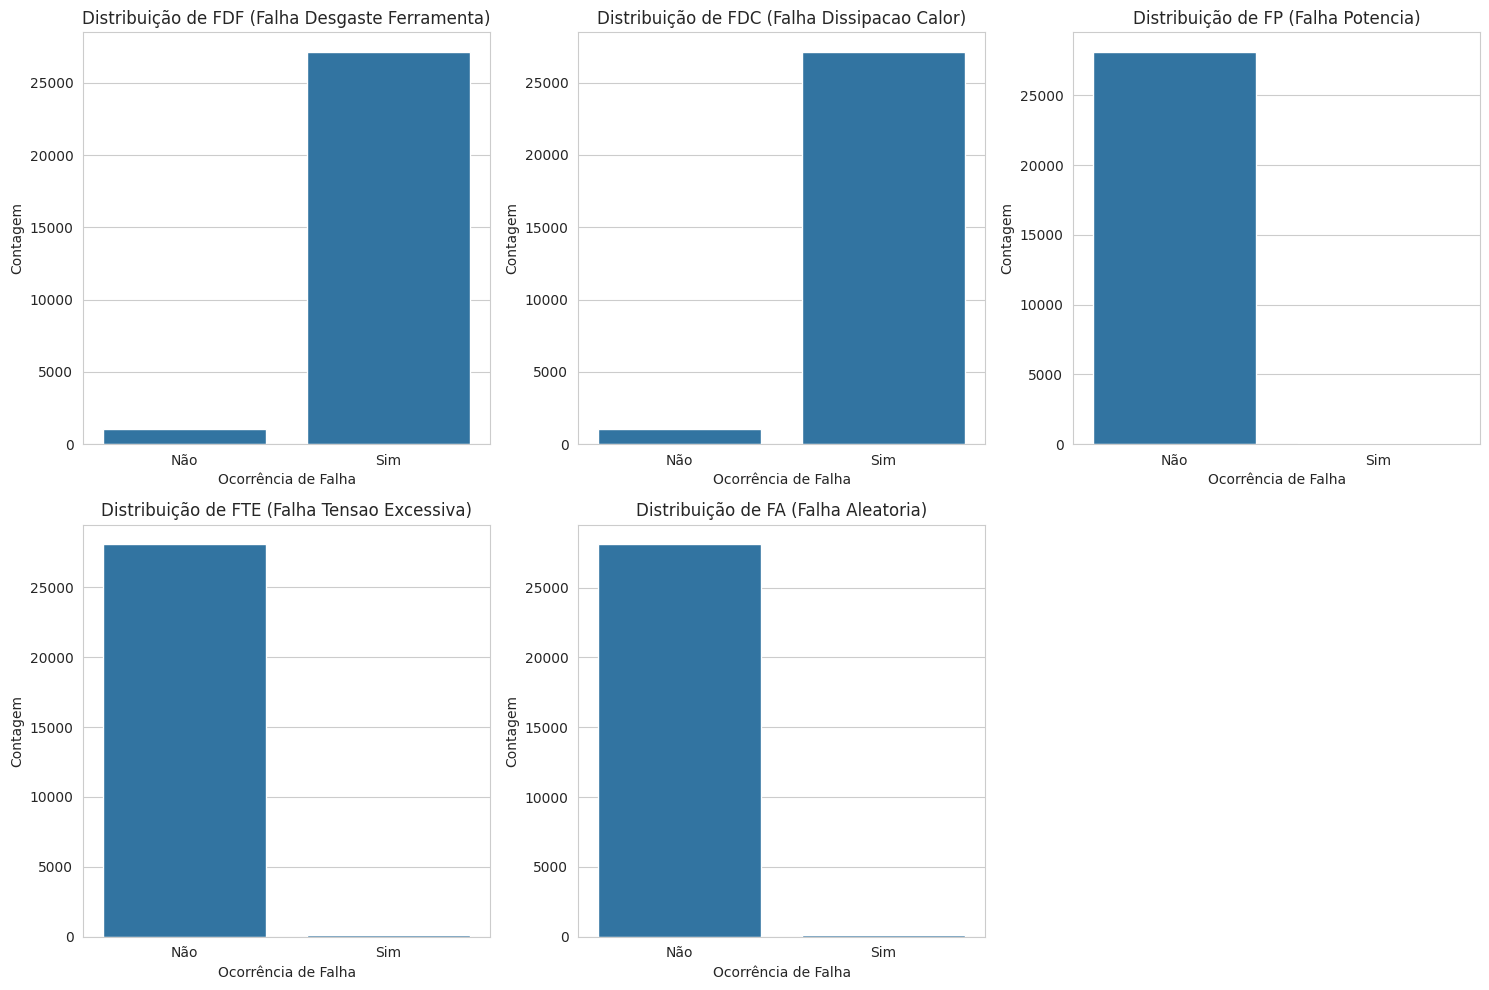

In [61]:
# Gráficos de contagem para cada tipo de falha
plt.figure(figsize=(15, 10))
for i, col in enumerate(colunas_rotulos):
    plt.subplot(2, 3, i + 1) # 2 linhas, 3 colunas para os subplots
    # Removido 'palette="viridis"' e 'hue=y_train[col]' por simplicidade com dados booleanos
    sns.countplot(x=y_train[col]) # Seaborn usará a paleta padrão
    plt.title(f"Distribuição de {col}")
    plt.xlabel("Ocorrência de Falha")
    plt.ylabel("Contagem")
    plt.xticks([0, 1], ["Não", "Sim"]) # Renomear ticks para melhor leitura
plt.tight_layout()
plt.show()

### 6.2. Relação entre Features Numéricas e Falhas

Vamos usar box plots para visualizar a distribuição das features numéricas em relação à ocorrência de falhas. Isso pode nos dar insights sobre quais features são mais discriminativas para cada tipo de falha.

In [62]:
# Selecionando algumas features numéricas para visualização
colunas_numericas = [
    'temperatura_ar',
    'temperatura_processo',
    'umidade_relativa',
    'velocidade_rotacional',
    'torque',
    'desgaste_da_ferramenta',
    'temperatura_diferencial',
    'potencia_estimada'
]

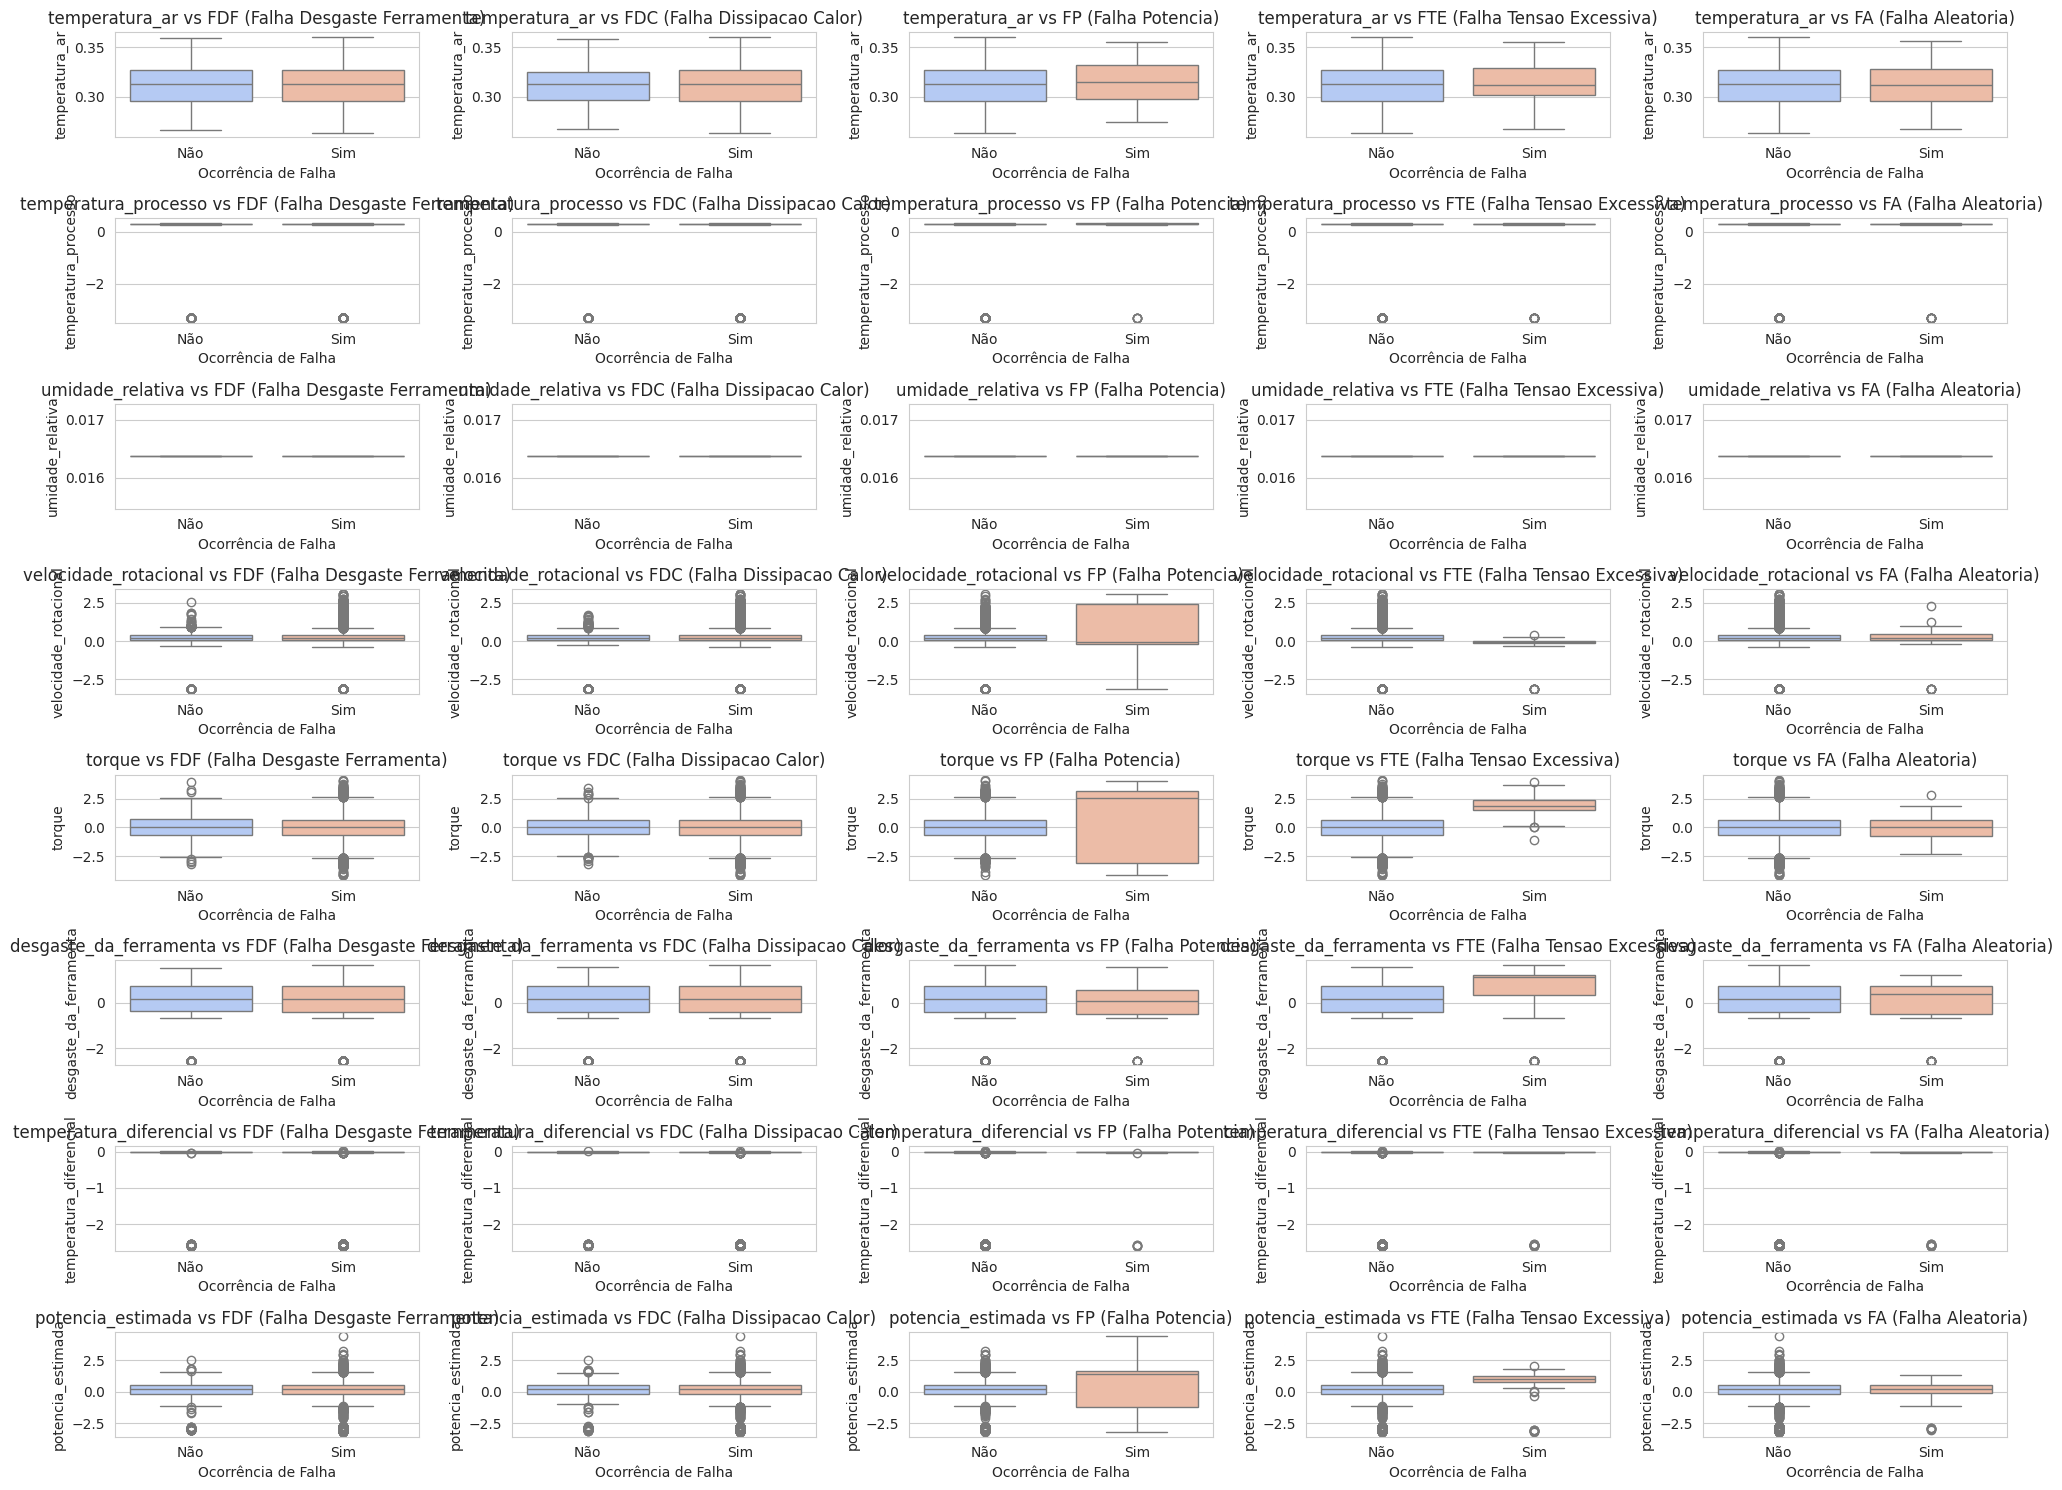

In [65]:
# Vamos criar um DataFrame temporário combinando X_train e y_train para facilitar a plotagem
df_plot = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(20, 15))
for i, feature in enumerate(colunas_numericas):
    for j, label in enumerate(colunas_rotulos):
        plt.subplot(len(colunas_numericas), len(colunas_rotulos), i * len(colunas_rotulos) + j + 1)
        # Corrigido FutureWarning: Atribuir 'label' a 'hue' e usar legend=False
        sns.boxplot(x=label, y=feature, data=df_plot, palette="coolwarm", hue=label, legend=False)
        plt.title(f"{feature} vs {label}")
        plt.xlabel("Ocorrência de Falha")
        plt.ylabel(feature)
        plt.xticks([0, 1], ["Não", "Sim"])
plt.tight_layout()
plt.show()

### 6.3. Matriz de Correlação das Features

Um heatmap da matriz de correlação entre as features numéricas pode ajudar a identificar relações lineares entre elas. Isso é útil para entender a multicolinearidade e a relação entre as features.

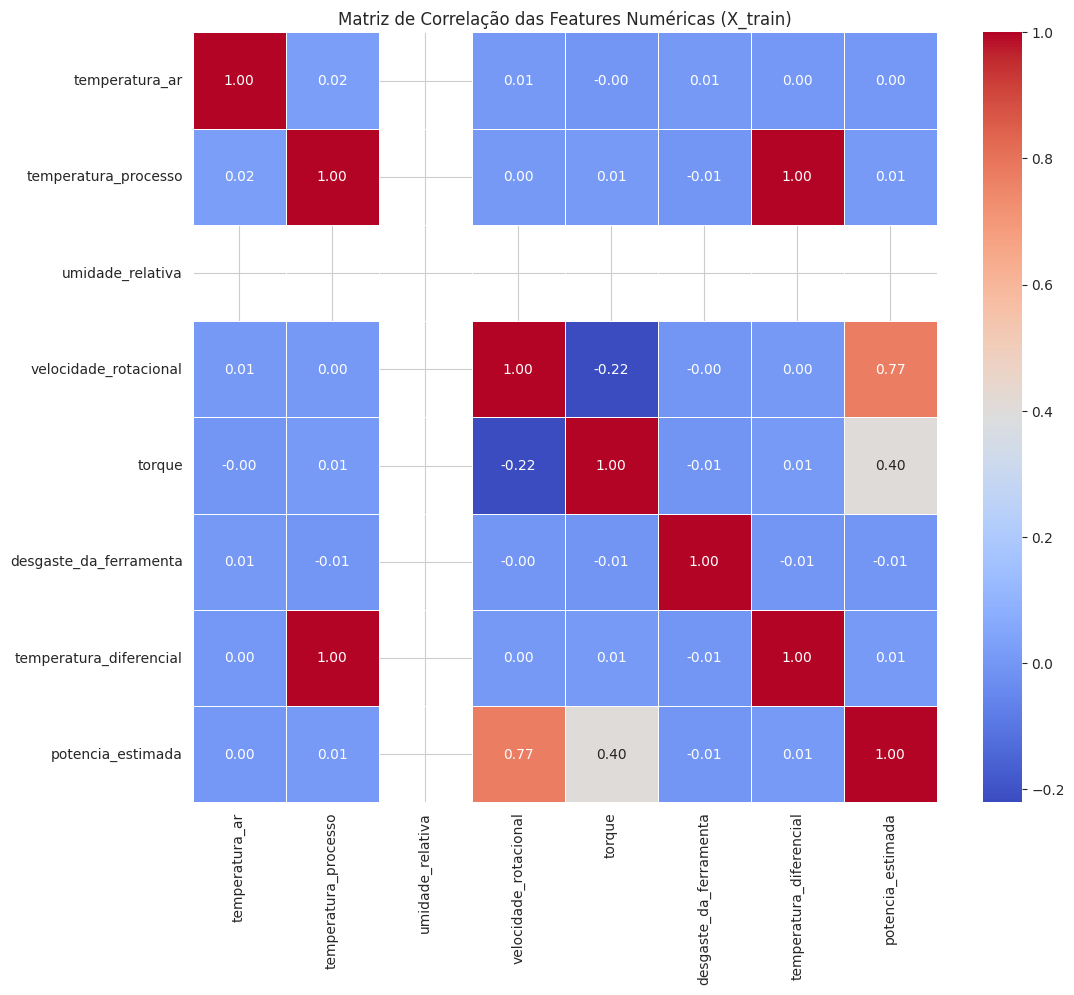

In [67]:
# Calculando a matriz de correlação para as features numéricas em X_train
correlation_matrix = X_train[colunas_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação das Features Numéricas (X_train)")
plt.show()

### 6.4. Visualização do Relatório de Classificação

Para tornar a interpretação das métricas de avaliação mais visual, podemos criar gráficos de barras para Precision, Recall e F1-Score para cada rótulo. Isso facilita a comparação do desempenho do modelo em diferentes tipos de falha.

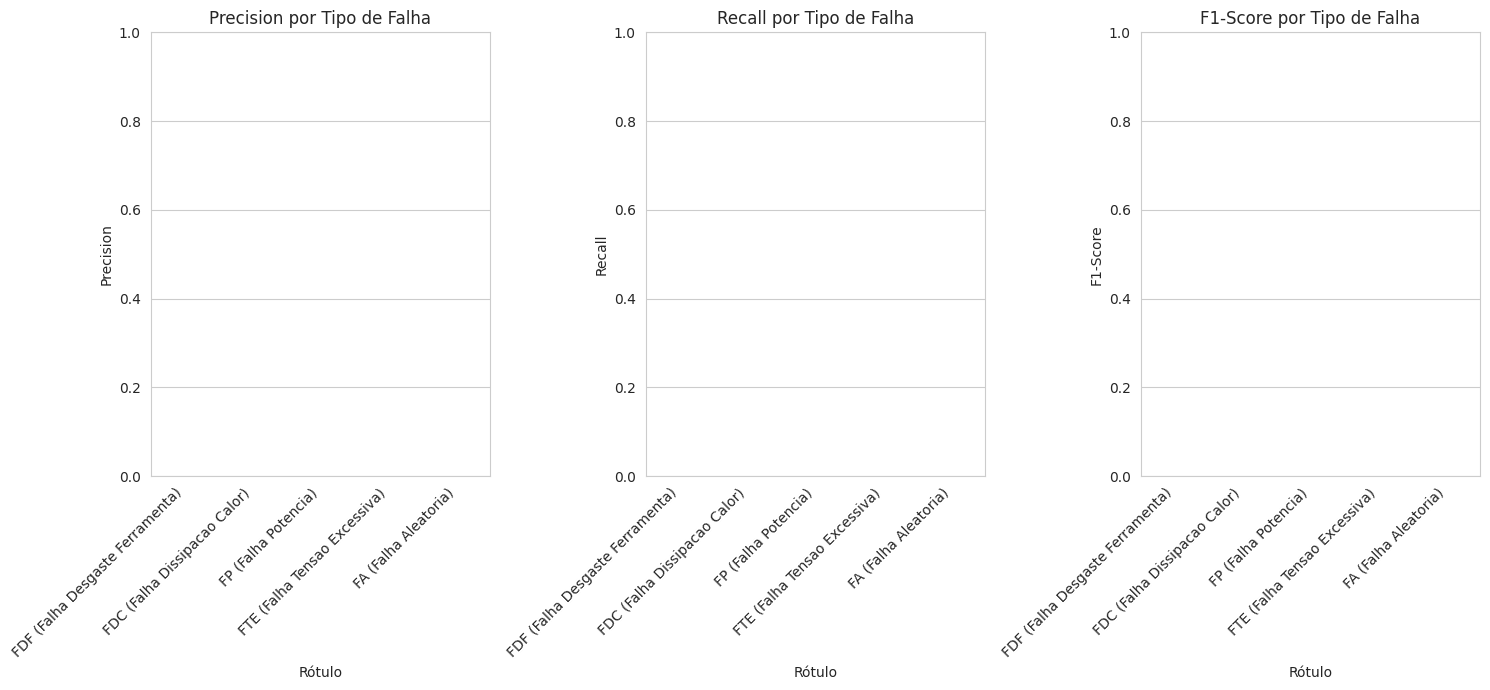

In [76]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação completo
report_dict = classification_report(y_test, y_pred, target_names=colunas_rotulos, output_dict=True, zero_division=0)

# Extrair as métricas para visualização
precision_scores = []
recall_scores = []
f1_scores = []

for label in colunas_rotulos:
    # Para problemas multirrótulo, o report_dict tem as métricas para cada rótulo
    # e dentro de cada rótulo, as métricas para as classes '0' e '1'.
    # Estamos interessados nas métricas da classe '1' (falha).
    if '1' in report_dict[label]:
        precision_scores.append(report_dict[label]["1"]["precision"])
        recall_scores.append(report_dict[label]["1"]["recall"])
        f1_scores.append(report_dict[label]["1"]["f1-score"])
    else:
        # Se a classe '1' não estiver presente no y_test para este rótulo, as métricas são 0
        precision_scores.append(0)
        recall_scores.append(0)
        f1_scores.append(0)

# Criar um DataFrame para facilitar a plotagem
metrics_df = pd.DataFrame({
    'Rótulo': colunas_rotulos,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

# Plotar as métricas
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.barplot(x="Rótulo", y="Precision", data=metrics_df, palette="Blues_d", hue="Rótulo", legend=False)
plt.title("Precision por Tipo de Falha")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

plt.subplot(1, 3, 2)
sns.barplot(x="Rótulo", y="Recall", data=metrics_df, palette="Greens_d", hue="Rótulo", legend=False)
plt.title("Recall por Tipo de Falha")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

plt.subplot(1, 3, 3)
sns.barplot(x="Rótulo", y="F1-Score", data=metrics_df, palette="Reds_d", hue="Rótulo", legend=False)
plt.title("F1-Score por Tipo de Falha")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

### 6.5. Considerações Finais sobre Visualização

Essas visualizações são um ponto de partida. Você pode explorar outras formas de apresentar seus dados e resultados, como:

*   **Curvas ROC:** Plotar as curvas ROC para cada rótulo pode ser muito informativo, especialmente para a sua apresentação.
*   **Análise de Erros:** Visualizar os casos em que o modelo errou (falsos positivos e falsos negativos) pode revelar padrões e ajudar a entender as limitações do modelo.
*   **Importância das Features:** Se o modelo permitir (como Random Forest), visualizar a importância de cada feature para a predição das falhas.
